In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

# Problem Description

![](https://objects-us-east-1.dream.io/mae223/2019f/mae223-l17-example-fig.png)

# Generalized coordinates

In [2]:
q1, q2, q3 = me.dynamicsymbols('q1, q2, q3')

# Generalized speeds

In [3]:
u1, u2, u3 = me.dynamicsymbols('u1, u2, u3')

# Specified Inputs

In [4]:
F, T = me.dynamicsymbols('F, T')

# Constants

In [5]:
k, c, ma, mb, mc, IB_bo, l, kT, g = sm.symbols('k, c, m_a, m_b, m_c, I_{B_bo}, l, k_T, g')
k, c, ma, mb, mc, IB_bo, l, kT, g

# Reference Frames

In [6]:
N = me.ReferenceFrame('N')

In [7]:
B = N.orientnew('B', 'Axis', (q2, N.z))

In [8]:
C = B.orientnew('C', 'Axis', (q3, N.z))

# Points

In [9]:
O = me.Point('O')

In [10]:
Pab = O.locatenew('P_{ab}', q1 * N.x)

In [11]:
Bo = Pab.locatenew('B_o', - 2 * l / 3 * B.y)

In [12]:
Pbc = Pab.locatenew('P_{bc}', -l * B.y)

In [13]:
Pc = Pbc.locatenew('P_c', -l * C.y)

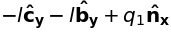

In [14]:
Pc.pos_from(O)

# Linear Velocities

In [15]:
Pab.set_vel(N, Pab.pos_from(O).dt(N))
Pab.vel(N)

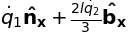

In [16]:
Bo.v2pt_theory(Pab, N, B)

In [17]:
Pbc.v2pt_theory(Pab, N, B)

In [18]:
Pc.v2pt_theory(Pbc, N, C)

# Kinematic Differential Equations

In [19]:
u1_eq = sm.Eq(u1, Pab.vel(N).dot(N.x))
u2_eq = sm.Eq(u2, Bo.vel(N).dot(B.x))
u3_eq = sm.Eq(u3, C.ang_vel_in(B).dot(B.z))

In [20]:
qdots = sm.solve([u1_eq, u2_eq, u3_eq], q1.diff(), q2.diff(), q3.diff())
qdots

Substitute expressions for the $\dot{q}$'s.

In [21]:
Pab.set_vel(N, Pab.vel(N).subs(qdots).simplify())
Pab.vel(N)

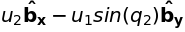

In [22]:
Bo.set_vel(N, Bo.vel(N).subs(qdots).express(B).simplify())
Bo.vel(N)

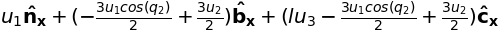

In [23]:
Pc.set_vel(N, Pc.vel(N).subs(qdots).simplify())
Pc.vel(N)

# Angular Velocities

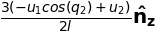

In [24]:
B.set_ang_vel(N, B.ang_vel_in(N).subs(qdots).simplify())
B.ang_vel_in(N)

In [25]:
C.set_ang_vel(B, u3 * N.z)

# Partial Velocities

Each partial velocity can be calculated manually like so:

In [26]:
Pab.vel(N).diff(u1, N)

Or you can use this convenience function:

In [27]:
Pab.partial_velocity(N, u1)

All partial velocities can be calculated at once with:

In [28]:
Pab.partial_velocity(N, u1, u2, u3)

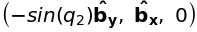

In [29]:
Bo.partial_velocity(N, u1, u2, u3)

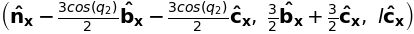

In [30]:
Pc.partial_velocity(N, u1, u2, u3)

This also works for angular partial velocities:

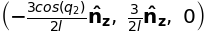

In [31]:
B.partial_velocity(N, u1, u2, u3)

The convenience function is doing this behind the scenes:

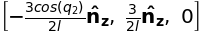

In [32]:
[B.ang_vel_in(N).diff(ur, N) for ur in [u1, u2, u3]]

# Angular Accelerations

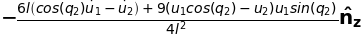

In [33]:
alpha_B_N = B.ang_acc_in(N).subs(qdots).simplify()
alpha_B_N

In [34]:
a_Pab_N = Pab.acc(N).subs(qdots).simplify()
a_Pab_N

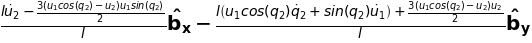

In [35]:
a_Bo_N = Bo.acc(N).express(B).simplify()
a_Bo_N

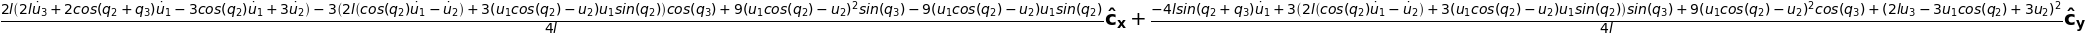

In [36]:
a_Pc_N = Pc.acc(N).express(C).subs(qdots).simplify()
a_Pc_N

# Mass and Inertia

In [37]:
ma, mc

In [38]:
IB = me.inertia(B, 0, 0, IB_bo)
IB

# Loads (forces and torques)

In [39]:
Rab = (F - k*q1 - c*qdots[q1.diff()]) * N.x
Rab

In [40]:
Rbo = -(mb*g)*N.y
Rbo

In [41]:
Rc = -(mc*g)*N.y
Rc

In [42]:
TB = (T + kT*q3)*N.z
TB

# Generalizd Active Forces

In [43]:
Pab.partial_velocity(N, u1).dot(Rab)

In [44]:
Pab.partial_velocity(N, u2).dot(Rab)

In [45]:
Bo.partial_velocity(N, u2).dot(Rbo) + B.partial_velocity(N, u2).dot(TB)

In [46]:
u = [u1, u2, u3]

In [47]:
Fr = []

for ur in u:
    Fr.append(Pab.partial_velocity(N, ur).dot(Rab) + # particle
              Pc.partial_velocity(N, ur).dot(Rc) + # particle
              Bo.partial_velocity(N, ur).dot(Rbo) + B.partial_velocity(N, ur).dot(TB)) # rigid body
    
Fr

In [48]:
Fr = sm.trigsimp(sm.Matrix(Fr))
Fr

⎡        g⋅m_b⋅sin(2⋅q₂)   3⋅g⋅m_c⋅sin(q₂ + q₃)⋅cos(q₂)   3⋅g⋅m_c⋅sin(2⋅q₂)   
⎢-c⋅u₁ + ─────────────── + ──────────────────────────── + ───────────────── - 
⎢               2                       2                         4           
⎢                                                                             
⎢                                    3⋅g⋅m_c⋅sin(q₂ + q₃)   3⋅g⋅m_c⋅sin(q₂)   
⎢                   -g⋅m_b⋅sin(q₂) - ──────────────────── - ─────────────── + 
⎢                                             2                    2          
⎢                                                                             
⎣                                            -g⋅l⋅m_c⋅sin(q₂ + q₃)            

           3⋅(k_T⋅q₃ + T)⋅cos(q₂)⎤
k⋅q₁ + F - ──────────────────────⎥
                    2⋅l          ⎥
                                 ⎥
3⋅(k_T⋅q₃ + T)                   ⎥
──────────────                   ⎥
     2⋅l                         ⎥
                                 ⎥
        

# Generalized Inertia Forces

In [49]:
Frstar = []

for ur in u:
    Frstar.append(Pab.partial_velocity(N, ur).dot(-ma*a_Pab_N) +
                  Pc.partial_velocity(N, ur).dot(-mc*a_Pc_N) +
                  Bo.partial_velocity(N, ur).dot(-mb*a_Bo_N) +
                  B.partial_velocity(N, ur).dot(-alpha_B_N.dot(IB) +
                                                B.ang_vel_in(N).cross(IB.dot(B.ang_vel_in(N)))))
    
Frstar = sm.Matrix(Frstar)

In [50]:
Frstar = sm.trigsimp(Frstar)

In [51]:
Frstar

⎡                2                                                  2    3    
⎢  9⋅I_{B_bo}⋅cos (q₂)⋅u₁̇   9⋅I_{B_bo}⋅cos(q₂)⋅u₂̇   27⋅I_{B_bo}⋅u₁ ⋅sin (q₂)
⎢- ─────────────────────── + ────────────────────── + ────────────────────────
⎢               2                        2                         3          
⎢            4⋅l                      4⋅l                       8⋅l           
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [52]:
f = Fr + Frstar

In [53]:
me.find_dynamicsymbols(f)

In [54]:
f.free_symbols

# Put in first order form

In [55]:
u = sm.Matrix(u)
u

⎡u₁⎤
⎢  ⎥
⎢u₂⎥
⎢  ⎥
⎣u₃⎦

In [56]:
u.diff()

⎡u₁̇⎤
⎢   ⎥
⎢u₂̇⎥
⎢   ⎥
⎣u₃̇⎦

In [57]:
M = f.jacobian(u.diff())
M = sm.trigsimp(M)
M

⎡                2                                                            
⎢  9⋅I_{B_bo}⋅cos (q₂)               2                                        
⎢- ─────────────────── - mₐ + m_b⋅cos (q₂) - m_b + 3⋅m_c⋅cos(q₂ + q₃)⋅cos(q₂) 
⎢             2                                                               
⎢          4⋅l                                                                
⎢                                                                             
⎢                        9⋅I_{B_bo}⋅cos(q₂)   9⋅m_c⋅cos(q₂ - q₃)   3⋅m_c⋅cos(q
⎢                        ────────────────── + ────────────────── + ───────────
⎢                                  2                  4                    4  
⎢                               4⋅l                                           
⎢                                                                             
⎢                                    -l⋅m_c⋅(-3⋅cos(q₂ - q₃) + cos(q₂ + q₃) - 
⎢                                    ───────────────

In [58]:
G = -(f - M * u.diff())

In [59]:
udots = M.LUsolve(G)

In [60]:
# udots  # no need to print, too long, may eat up your computer's memory